NOMBRE: JOSELYN TACO

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from math import sqrt
from sklearn.metrics import r2_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, accuracy_score

from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import  RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("SolarPrediction.csv", sep=";")

In [3]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,6:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,6:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,6:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,6:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,6:13:00,18:13:00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d70434cd0>,
      dtype=object)

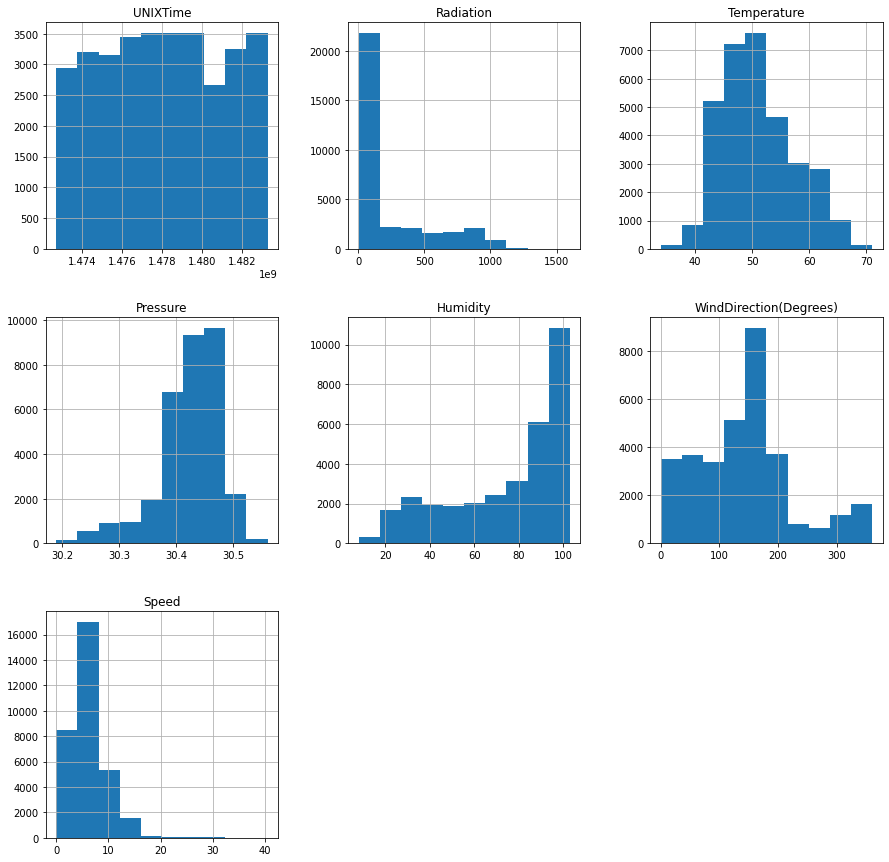

In [6]:
data.hist(figsize=(15,15))

In [7]:
data.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

**PEARSON**

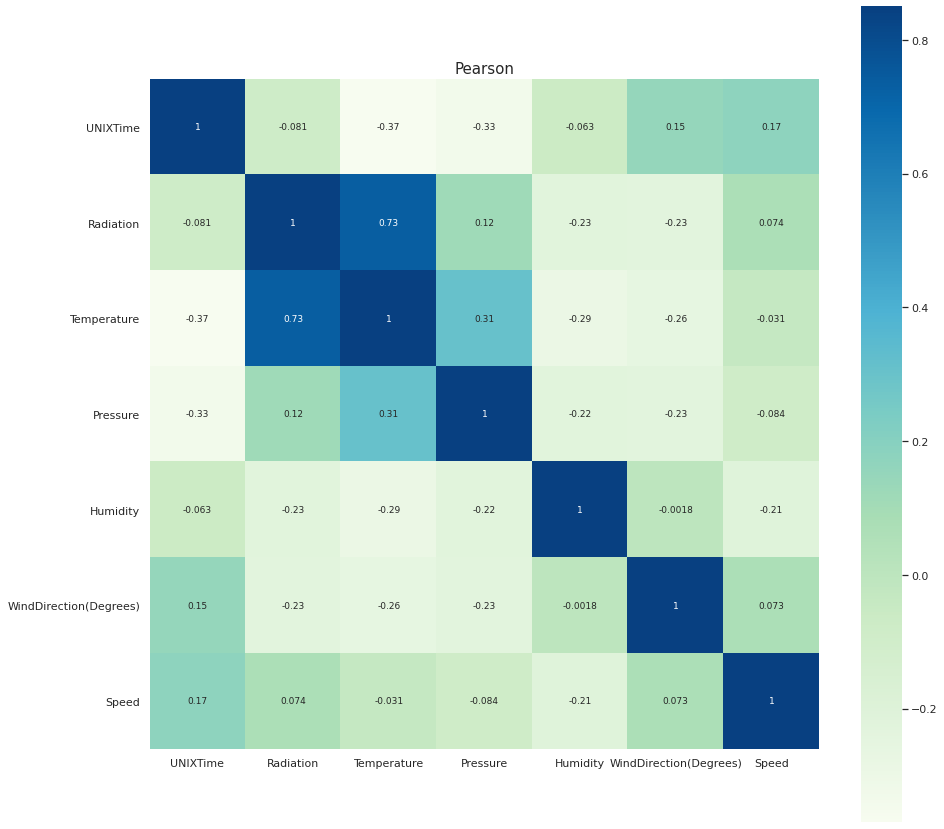

In [8]:
sns.set(style= "whitegrid", font_scale = 1)
plt. figure(figsize=(15,15))
plt.title('Pearson', fontsize=15)
sns.heatmap(data.corr(), vmax=0.85, square=True, cmap='GnBu',linecolor='b', annot=True, annot_kws={'size':9})

Tratamiento de datos de tiempo


In [9]:
data_aux = data

In [10]:
data_aux

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,6:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,6:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,6:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,6:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,6:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/01/2016 0:00,0:20:04,1.22,44,30.43,102,145.42,6.75,6:41:00,17:42:00
32682,1480587301,12/01/2016 0:00,0:15:01,1.17,44,30.42,102,117.78,6.75,6:41:00,17:42:00
32683,1480587001,12/01/2016 0:00,0:10:01,1.20,44,30.42,102,145.19,9.00,6:41:00,17:42:00
32684,1480586702,12/01/2016 0:00,0:05:02,1.23,44,30.42,101,164.19,7.87,6:41:00,17:42:00


UNIXTime

In [11]:
datetime_utc = data_aux['UNIXTime'].apply(datetime.datetime.utcfromtimestamp)

In [12]:
datetime_utc

0       2016-09-30 09:55:26
1       2016-09-30 09:50:23
2       2016-09-30 09:45:26
3       2016-09-30 09:40:21
4       2016-09-30 09:35:24
                ...        
32681   2016-12-01 10:20:04
32682   2016-12-01 10:15:01
32683   2016-12-01 10:10:01
32684   2016-12-01 10:05:02
32685   2016-12-01 10:00:02
Name: UNIXTime, Length: 32686, dtype: datetime64[ns]

Data

In [13]:
fecha = data_aux['Data']
fecha

0        9/29/2016 12:00:00 AM
1        9/29/2016 12:00:00 AM
2        9/29/2016 12:00:00 AM
3        9/29/2016 12:00:00 AM
4        9/29/2016 12:00:00 AM
                 ...          
32681          12/01/2016 0:00
32682          12/01/2016 0:00
32683          12/01/2016 0:00
32684          12/01/2016 0:00
32685          12/01/2016 0:00
Name: Data, Length: 32686, dtype: object

In [14]:
data_aux['mes'] = pd.to_datetime(data_aux['Data']).apply(lambda date:date.month)
data_aux['mes']

0         9
1         9
2         9
3         9
4         9
         ..
32681    12
32682    12
32683    12
32684    12
32685    12
Name: mes, Length: 32686, dtype: int64

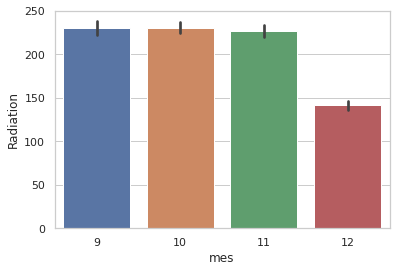

In [15]:
ax = plt.axes()
sns.barplot(x="mes", y='Radiation', data=data_aux, ax = ax)
plt.show()

Time

In [16]:
tiempo= data_aux['Time']
tiempo

0        23:55:26
1        23:50:23
2        23:45:26
3        23:40:21
4        23:35:24
           ...   
32681     0:20:04
32682     0:15:01
32683     0:10:01
32684     0:05:02
32685     0:00:02
Name: Time, Length: 32686, dtype: object

In [17]:
data_aux['hora'] = pd.to_datetime(data_aux['Time']).dt.hour
data_aux['hora']

0        23
1        23
2        23
3        23
4        23
         ..
32681     0
32682     0
32683     0
32684     0
32685     0
Name: hora, Length: 32686, dtype: int64

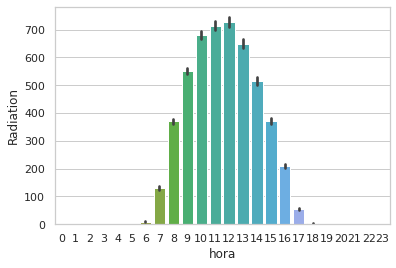

In [18]:
ax = plt.axes()
sns.barplot(x="hora", y='Radiation', data=data_aux, ax = ax)
plt.show()

TimeSunRise

In [19]:
timeSunRiseHour = pd.to_datetime(data_aux['TimeSunRise']).dt.hour
timeSunRisemin = pd.to_datetime(data_aux['TimeSunRise']).dt.minute
timeSunRiseminutes = (timeSunRiseHour*60)+timeSunRisemin
timeSunRiseminutes

0        373
1        373
2        373
3        373
4        373
        ... 
32681    401
32682    401
32683    401
32684    401
32685    401
Name: TimeSunRise, Length: 32686, dtype: int64

TimeSunSet

In [20]:
timeSunSetHour = pd.to_datetime(data['TimeSunSet']).dt.hour
timeSunSetmin = pd.to_datetime(data['TimeSunSet']).dt.minute
timeSunSetminutes = (timeSunSetHour*60)+timeSunSetmin
timeSunSetminutes

0        1093
1        1093
2        1093
3        1093
4        1093
         ... 
32681    1062
32682    1062
32683    1062
32684    1062
32685    1062
Name: TimeSunSet, Length: 32686, dtype: int64

In [21]:
data_aux['diferencia'] = timeSunSetminutes - timeSunRiseminutes
data_aux['diferencia']

0        720
1        720
2        720
3        720
4        720
        ... 
32681    661
32682    661
32683    661
32684    661
32685    661
Name: diferencia, Length: 32686, dtype: int64

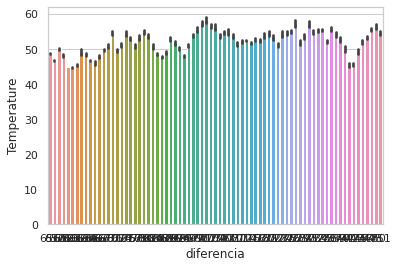

In [22]:
ax = plt.axes()
sns.barplot(x="diferencia", y='Temperature', data=data_aux, ax = ax)
plt.show()

Nuevo Analisis

In [23]:
data_aux = data_aux.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'], axis=1)

In [24]:
data_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Radiation               32686 non-null  float64
 1   Temperature             32686 non-null  int64  
 2   Pressure                32686 non-null  float64
 3   Humidity                32686 non-null  int64  
 4   WindDirection(Degrees)  32686 non-null  float64
 5   Speed                   32686 non-null  float64
 6   mes                     32686 non-null  int64  
 7   hora                    32686 non-null  int64  
 8   diferencia              32686 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 2.2 MB


In [25]:
data_aux.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,mes,hora,diferencia
0,1.21,48,30.46,59,177.39,5.62,9,23,720
1,1.21,48,30.46,58,176.78,3.37,9,23,720
2,1.23,48,30.46,57,158.75,3.37,9,23,720
3,1.21,48,30.46,60,137.71,3.37,9,23,720
4,1.17,48,30.46,62,104.95,5.62,9,23,720


In [27]:
data_aux.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,mes,hora,diferencia
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,10.526066,11.557425,690.550542
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,1.096691,6.912034,29.931225
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,9.000000,0.000000,656.000000
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,10.000000,6.000000,662.000000
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,11.000000,12.000000,684.000000
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,11.000000,18.000000,715.000000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,12.000000,23.000000,751.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d675253d0>,
      dtype=object)

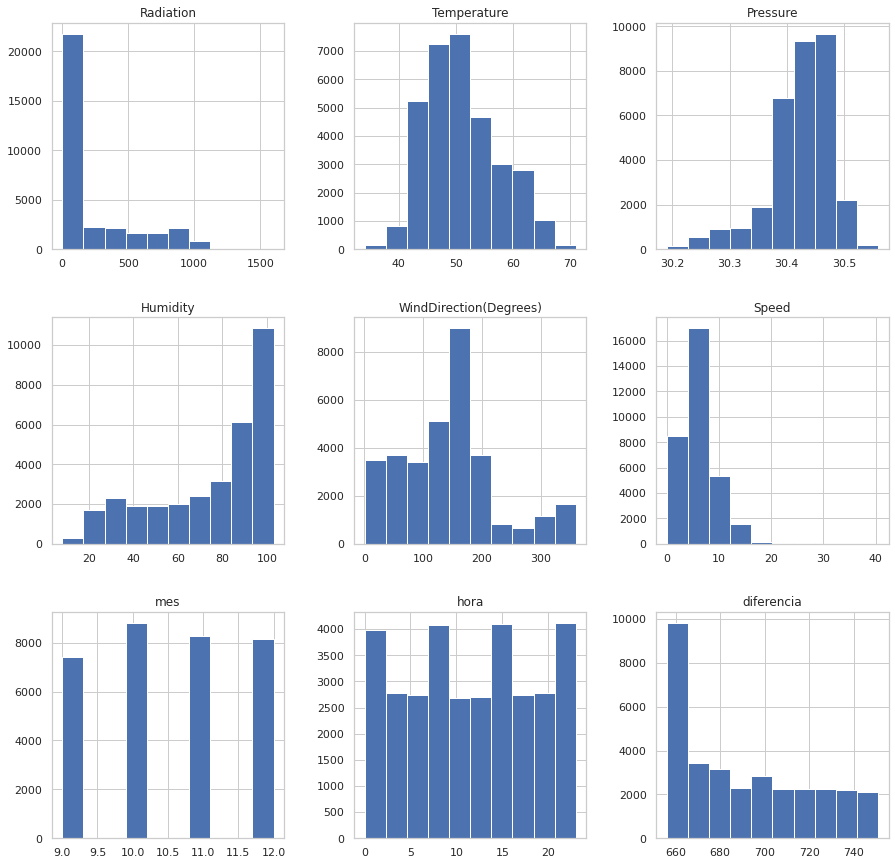

In [28]:
data_aux.hist(figsize=(15,15))

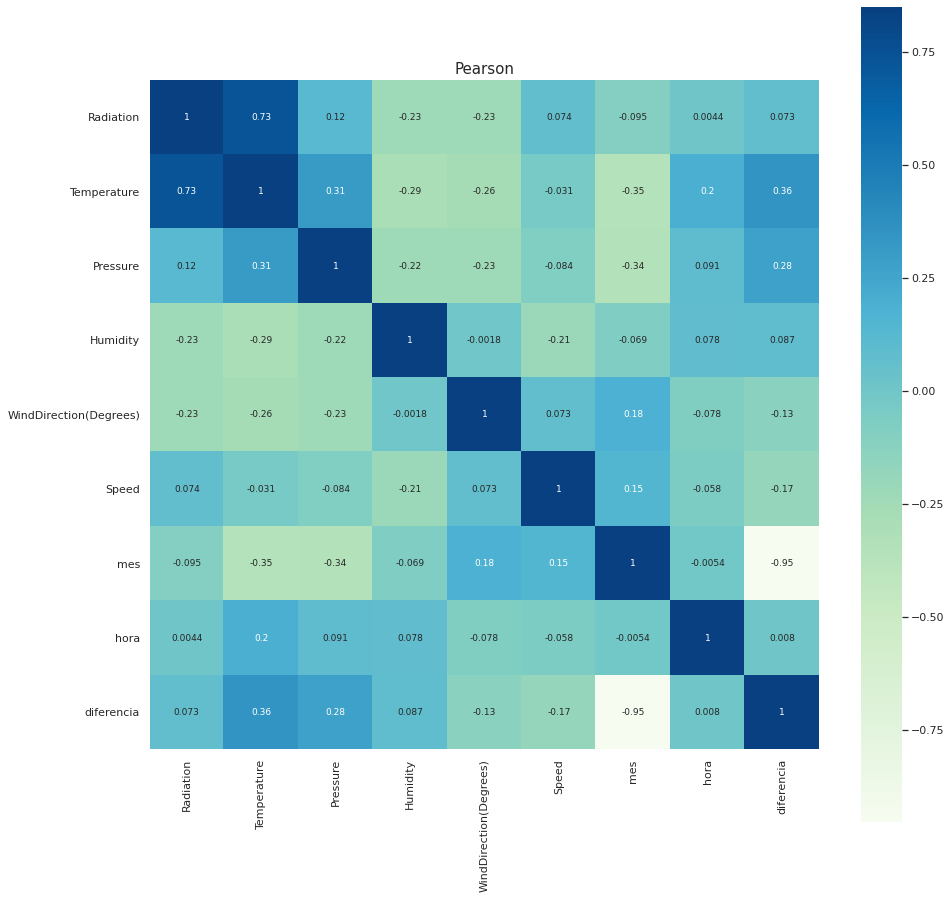

In [29]:
sns.set(style= "whitegrid", font_scale = 1)
plt. figure(figsize=(15,15))
plt.title('Pearson', fontsize=15)
sns.heatmap(data_aux.corr(), vmax=0.85, square=True, cmap='GnBu',linecolor='b', annot=True, annot_kws={'size':9})

Separacion en X y Y

In [155]:
x = data_aux

In [156]:
x = x.drop(['Radiation'], axis = 1)

In [158]:
x

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,mes,hora,diferencia
0,48,30.46,59,177.39,5.62,9,23,720
1,48,30.46,58,176.78,3.37,9,23,720
2,48,30.46,57,158.75,3.37,9,23,720
3,48,30.46,60,137.71,3.37,9,23,720
4,48,30.46,62,104.95,5.62,9,23,720
...,...,...,...,...,...,...,...,...
32681,44,30.43,102,145.42,6.75,12,0,661
32682,44,30.42,102,117.78,6.75,12,0,661
32683,44,30.42,102,145.19,9.00,12,0,661
32684,44,30.42,101,164.19,7.87,12,0,661


In [159]:
y = data_aux.Radiation
y

0        1.21
1        1.21
2        1.23
3        1.21
4        1.17
         ... 
32681    1.22
32682    1.17
32683    1.20
32684    1.23
32685    1.20
Name: Radiation, Length: 32686, dtype: float64

MODELOS

In [113]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [160]:
Resultados_train = []
Resultados_test = []
Resultados_train_mae = []
Resultados_test_mae = []

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 20)

REGRESION LOGISTICA

In [162]:
lr = LinearRegression()

In [163]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train

In [164]:
y_pred_train = lr.predict(x_train)
Resultados_train.append(r2_score(y_train, lr.predict(x_train)))
Resultados_train_mae.append(mean_absolute_error(y_train, lr.predict(x_train)))
print(r2_score(y_train, y_pred_train))
print(mean_absolute_error(y_train, y_pred_train))

0.6213790489445539
147.0372711970728


Test

In [165]:
y_pred_test = lr.predict(x_test)
Resultados_test.append(r2_score(y_test, lr.predict(x_test)))
Resultados_test_mae.append(mean_absolute_error(y_test, lr.predict(x_test)))
print(r2_score(y_test, y_pred_test))
print(mean_absolute_error(y_test, y_pred_test))

0.6222514579652544
148.47660435538674


ANN

In [166]:
model = Sequential()
#capa entrada
model.add(Dense(7, activation= 'relu'))
#capas ocultas
model.add(Dense(5, activation= 'relu'))
model.add(Dense(1, activation= 'relu'))

model.compile(optimizer= 'adam', loss = 'mse')

In [167]:
model.fit(x = x_train, y = y_train.values, validation_data=(x_test,y_test.values), batch_size=60,epochs=150,verbose=1)

Epoch 1/150
382/382 [==============================] - 2s 2ms/step - loss: 103611.5703 - val_loss: 95135.4609
Epoch 2/150
382/382 [==============================] - 1s 2ms/step - loss: 92203.8516 - val_loss: 91096.2891
Epoch 3/150
382/382 [==============================] - 1s 2ms/step - loss: 86963.6172 - val_loss: 82480.9062
Epoch 4/150
382/382 [==============================] - 1s 2ms/step - loss: 77555.2188 - val_loss: 74050.3281
Epoch 5/150
382/382 [==============================] - 1s 2ms/step - loss: 70371.6172 - val_loss: 68292.6797
Epoch 6/150
382/382 [==============================] - 1s 2ms/step - loss: 65619.8984 - val_loss: 64667.8672
Epoch 7/150
382/382 [==============================] - 1s 2ms/step - loss: 62176.5938 - val_loss: 61635.3164
Epoch 8/150
382/382 [==============================] - 1s 2ms/step - loss: 59412.8789 - val_loss: 59043.9688
Epoch 9/150
382/382 [==============================] - 1s 2ms/step - loss: 57817.6328 - val_loss: 58284.7773
Epoch 10/150
382/3

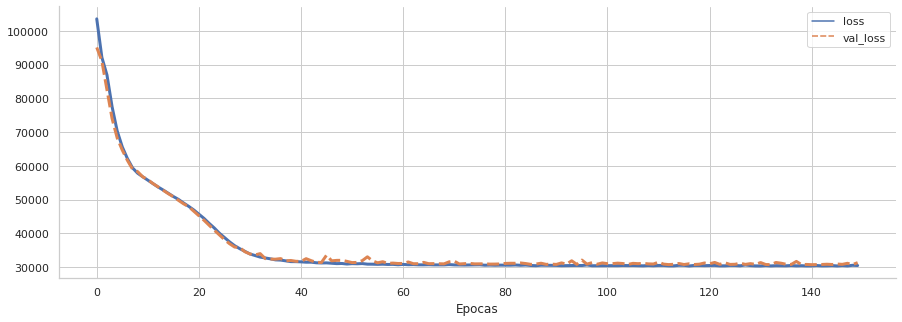

In [168]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data = loss, lw=3)
plt.xlabel('Epocas')
sns.despine()

Train

In [169]:
y_pred_train = model.predict(x_train)
Resultados_train.append(r2_score(y_train, model.predict(x_train)))
Resultados_train_mae.append(mean_absolute_error(y_train, model.predict(x_train)))
print(r2_score(y_train, y_pred_train))
print(mean_absolute_error(y_train, y_pred_train))

0.6902965501901102
111.05988763338034


Test

In [170]:
y_pred_test = model.predict(x_test)
Resultados_test.append(r2_score(y_test, model.predict(x_test)))
Resultados_test_mae.append(mean_absolute_error(y_test, model.predict(x_test)))
print(r2_score(y_test, y_pred_test))
print(mean_absolute_error(y_test, y_pred_test))

0.6890531005384672
112.92053859746483


SVM

In [171]:
svm = SVR(kernel='linear', verbose=True)
svm.fit(x_train,y_train)

[LibSVM]

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

Train

In [172]:
y_pred_train = svm.predict(x_train)
Resultados_train.append(r2_score(y_train, svm.predict(x_train)))
Resultados_train_mae.append(mean_absolute_error(y_train, svm.predict(x_train)))
print(r2_score(y_train, y_pred_train))
print(mean_absolute_error(y_train, y_pred_train))

0.6182847505698907
145.1085544846053


Test

In [173]:
y_pred_test = svm.predict(x_test)
Resultados_test.append(r2_score(y_test, svm.predict(x_test)))
Resultados_test_mae.append(mean_absolute_error(y_test, svm.predict(x_test)))
print(r2_score(y_test, y_pred_test))
print(mean_absolute_error(y_test, y_pred_test))

0.6191240685329091
146.51800178902516


KNN

In [174]:
error =[]

for n in range(1,10):
  knn = KNeighborsRegressor(n_neighbors= n)
  knn.fit(x_train, y_train)
  predic_n = knn.predict(x_test)
  error.append(np.mean(predic_n != y_test))

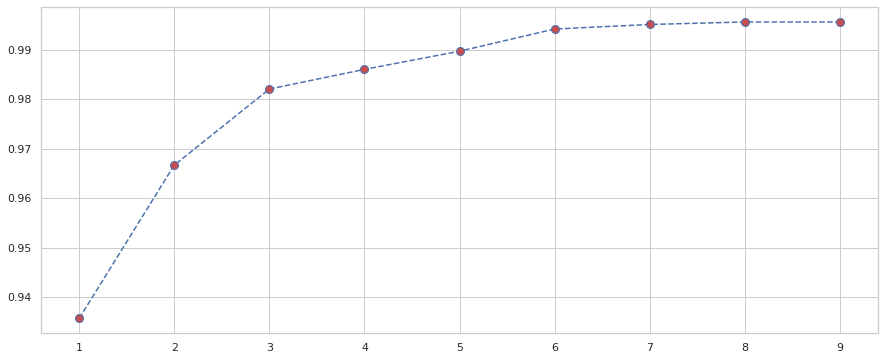

In [175]:
plt.figure(figsize=(15,6))
plt.plot(range(1,10), error, color = 'b', linestyle= 'dashed', marker = 'o', markerfacecolor= 'r', markersize= '8')

In [176]:
knn_c = KNeighborsRegressor(n_neighbors=2)
knn_c.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

Train

In [177]:
y_pred_train = knn_c.predict(x_train)
Resultados_train.append(r2_score(y_train, knn_c.predict(x_train)))
Resultados_train_mae.append(mean_absolute_error(y_train, knn_c.predict(x_train)))
print(r2_score(y_train, y_pred_train))
print(mean_absolute_error(y_train, y_pred_train))

0.9271534045579846
39.42588548951048


Test

In [178]:
y_pred_test = knn_c.predict(x_test)
Resultados_test.append(r2_score(y_test, knn_c.predict(x_test)))
Resultados_test_mae.append(mean_absolute_error(y_test, knn_c.predict(x_test)))
print(r2_score(y_test, y_pred_test))
print(mean_absolute_error(y_test, y_pred_test))

0.7671700597425674
74.02762594330002


RandomForest

In [179]:
modelRF = RandomForestRegressor(n_estimators=20)
modelRF.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Train

In [180]:
y_pred_train = modelRF.predict(x_train)
Resultados_train.append(r2_score(y_train, modelRF.predict(x_train)))
Resultados_train_mae.append(mean_absolute_error(y_train, modelRF.predict(x_train)))
print(r2_score(y_train, y_pred_train))
print(mean_absolute_error(y_train, y_pred_train))

0.9875420678992516
14.114046067127317


Test

In [181]:
y_pred_test = modelRF.predict(x_test)
Resultados_test.append(r2_score(y_test, modelRF.predict(x_test)))
Resultados_test_mae.append(mean_absolute_error(y_test, modelRF.predict(x_test)))
print(r2_score(y_test, y_pred_test))
print(mean_absolute_error(y_test, y_pred_test))

0.9252145492744065
36.41791404058173


In [127]:
import pickle
filename = 'modelRF.h5'
pickle.dump(modelRF, open(filename, 'wb'))

In [136]:
dato1 = data_aux.drop('Radiation', axis=1).iloc[10]
dato1

Temperature                49.00
Pressure                   30.47
Humidity                   93.00
WindDirection(Degrees)    120.55
Speed                       2.25
mes                         9.00
hora                       23.00
diferencia                720.00
Name: 10, dtype: float64

In [151]:
dato2 = data_aux.drop('Radiation', axis=1).iloc[120]
dato2

Temperature                62.00
Pressure                   30.43
Humidity                   47.00
WindDirection(Degrees)    346.87
Speed                       5.62
mes                         9.00
hora                       13.00
diferencia                720.00
Name: 120, dtype: float64

In [ ]:
print('Valor Real: ', data_aux.iloc[120]['Radiation'])

In [134]:
modelo = pickle.load(open("modelRF.h5", 'rb'))

In [ ]:
print('Valore Predicccion: ',modelRF.predict(dato2.values.reshape(1,8)))

**RESULTADOS**

In [182]:
Resultados=pd.DataFrame({"model":['Linear Regression', 'ANN', 'SVR','KNN', 'RandomForest'],
                   "r2Train":[Resultados_train[0],Resultados_train[1],Resultados_train[2],Resultados_train[3],Resultados_train[4]],
                   "maeTrain":[Resultados_train_mae[0],Resultados_train_mae[1],Resultados_train_mae[2],Resultados_train_mae[3],Resultados_train_mae[4]],
                   "r2Test":[Resultados_test[0],Resultados_test[1],Resultados_test[2],Resultados_test[3],Resultados_test[4]],
                   "maeTest":[Resultados_test_mae[0],Resultados_test_mae[1],Resultados_test_mae[2],Resultados_test_mae[3],Resultados_test_mae[4]]
                   })

**PRESENTACION DE RESULTADOS**

**Modelos**

In [183]:
Resultados

,model,r2Train,maeTrain,r2Test,maeTest
0,Linear Regression,0.621379,147.037271,0.622251,148.476604
1,ANN,0.690297,111.059888,0.689053,112.920539
2,SVR,0.618285,145.108554,0.619124,146.518002
3,KNN,0.927153,39.425885,0.767170,74.027626
4,RandomForest,0.987542,14.114046,0.925215,36.417914
